In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot

In [2]:
df=pd.read_csv("/Users............................................") #Reading in data from CSV
                                                                     #Replace the "path" with the file path location. 
                                                                   

# Data Understanding phase:
Conducting examination for duplicated rows across all columns.
Identifying and addressing missing data. During the data preparation stage, rows containing missing values can be either eliminated or imputed.
For this analysis, we will exclude rows with missing medal information and focus our examination solely on athletes who have received one of the three awards.


In [3]:
df.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info() #Data type for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df[df.duplicated()].shape #The output provides the count of duplicated rows in the dataset.

(1385, 15)

In [6]:
df=df.drop_duplicates() #Removing duplicate rows from the dataset.

In [7]:
df.isnull().sum() #Checking for missing values

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [8]:
df=df.dropna(subset=["Medal"]) #Omitting rows without medal information.
df.shape

(39772, 15)

In [9]:
df.query("Age.isnull() and Height.isnull() and Weight.isnull()").shape #Check the number of rows where all 3 values are missing 

(689, 15)

In [10]:
df.describe() #Obtaining descriptive statistics for numerical values.

,ID,Age,Height,Weight,Year
count,39772.000000,39044.000000,31072.000000,30456.000000,39772.000000
mean,69408.422357,25.923112,177.554197,73.770680,1973.964296
std,38849.931562,5.910831,10.893723,15.016025,33.805168
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36497.500000,22.000000,170.000000,63.000000,1952.000000
50%,68991.500000,25.000000,178.000000,73.000000,1984.000000
75%,103461.250000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


# Data exploration using plots: 
Columns such as ID and Name will be excluded from further analysis as they represent sample identification rather than relevant features.
Please note that not all columns will be plotted for this particular case.. 

In [11]:
df=df.drop(columns=["ID", "Name"]) #Dropping ID and Name from the dataframe

Text(0.5, 1.0, 'Correlation Heatmap')

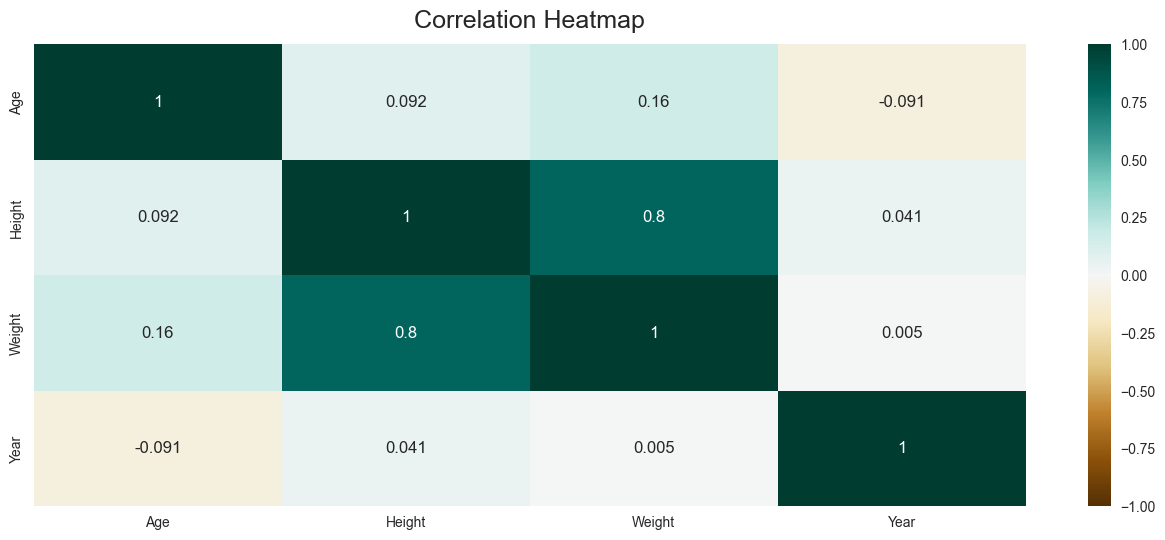

In [12]:
# Plotting the correlation of numeric variables in the dataset.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.select_dtypes(include=['number']).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

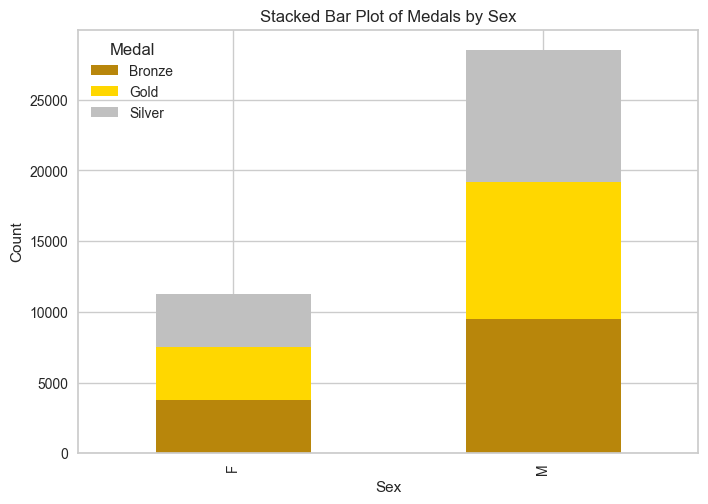

In [13]:
# Group data by 'sex' and 'Medal', and count occurrences
colors = ['darkgoldenrod', 'gold', 'silver']
grouped = df.groupby(['Sex', 'Medal']).size().unstack()
grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Medals by Sex')
plt.show()

# Linear Regression
Linear Regression extends simple linear regression, which involves only one independent variable,
to incorporate several predictors. This allows for a more comprehensive understanding of how various factors 
influence the outcome of interest.
In this scenario, we seek to elucidate the height variable based on the factors of sex, age, weight, sport, and medal. 

In [17]:
#Liniar regression 
df_LR = df[['Sex', 'Age', 'Height', 'Weight','Sport','Medal']] #Selecting variables for linear regression.

In [18]:
df_LR["Height"]=df_LR["Height"].fillna(df_LR["Height"].mean())#Imputing missing height values with the mean value.

/var/folders/d4/pn3_z59x3p9by5qp8vjbxq500000gn/T/ipykernel_21967/4176392850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LR["Height"]=df_LR["Height"].fillna(df_LR["Height"].mean())#Imputing missing height values with the mean value.


In [19]:
#Dividing data into target and predictors.
X=df_LR.drop('Height', axis=1)#targer
y=df_LR.Height #predictors

In [20]:
#dividing to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=34)

In [21]:
# Define columns for each step in the  preprocessing pipeline
numeric_features = ['Age', 'Weight']
categorical_features = ['Sex','Sport','Medal']

In [22]:
#steps for numeric transformation
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

In [23]:
#steps for categorical encoding
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder())])

In [24]:
#combining preprocessing steps 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [25]:
# pipline with preprocessor and LinearRegression
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('reg', LinearRegression())
    ]
)


In [26]:
pipe.fit(X_train, y_train) #training/fitting training portion of the data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Sport', 'Medal'])])),
                ('reg', LinearRegression())])

In [27]:
y_pred=pipe.predict(X_test) #Predicting on unseen data test portion of the data.

# Explain Result for Liniar Regression
## Mean Absolute Error 
(MAE) Represents the average of the absolute differences between 
the predicted and actual values. In this case, the MAE of 3.672 indicates that, on average, 
the model's predictions are off by approximately 3.672 units.
## Mean Squared Error 
(MSE) Calculates the average of the squared differences between 
the predicted and actual values. RMSE of 4.989, it signifies that, on average, 
the model's predictions differ from the actual values by approximately 4.989 units
## Root Mean Squared Error 
(RMSE) is the square root of the MSE and gives a more interpretable error metric
in the same units as the dependent variable. 
## R-squared 
Value of 0.74 indicates that 74% of the variance in the dependent variable 
can be explained by the independent variables in the model. 


In [28]:
#Printing Metrics for the model
print('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute error: 3.6722513277597235
Mean Squared error: 24.89493466265152
Root Mean Squared Error: 4.989482404283185


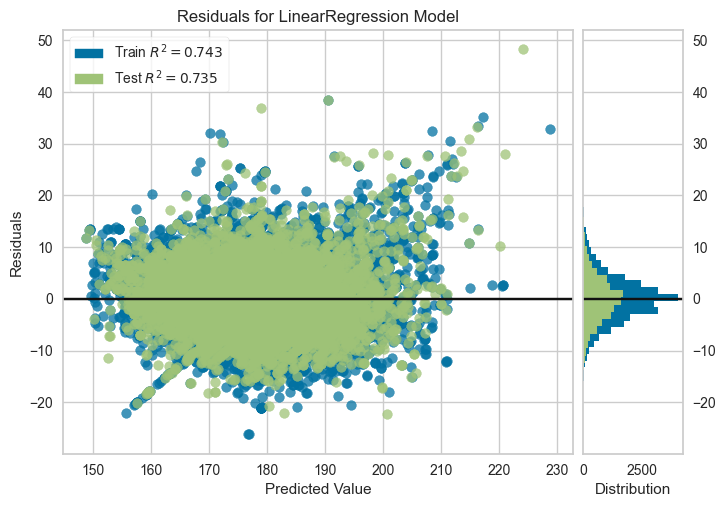

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
# residual visualization
visualizer= ResidualsPlot(pipe)
visualizer.fit(X_train, y_train)# Fit the training data to the visualizer
visualizer.score(X_test, y_test)# Evaluate the model on the test data 
visualizer.poof()